In [32]:
# import splitfolders
# input_folder='C:/Users/Corrupted/Desktop/S_Sorted_data'
# splitfolders.ratio(input_folder,output='C:/Users/Corrupted/Desktop/S_output',seed=42,ratio=(.7,.2,.1))

In [33]:
train_dir = 'C:/Users/Corrupted/Desktop/S_output/train'
test_dir = 'C:/Users/Corrupted/Desktop/S_output/test'
val_dir = 'C:/Users/Corrupted/Desktop/S_output/val'

In [34]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
#
train_data = image_dataset_from_directory(train_dir, label_mode="binary",
                                          image_size=(224, 224), batch_size=32,
                                          shuffle=True, seed=42)
test_data = image_dataset_from_directory(test_dir, label_mode="binary",
                                         image_size=(224, 224), batch_size=32,
                                         shuffle=False, seed=42)
val_data = image_dataset_from_directory(val_dir, label_mode="binary",
                                        image_size=(224, 224), batch_size=32,
                                        shuffle=False, seed=42)

Found 207 files belonging to 2 classes.
Found 30 files belonging to 2 classes.
Found 59 files belonging to 2 classes.


In [35]:
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=6,
                                              min_delta=0.0001)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2,
                                                 patience=4, min_lr=1e-7)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
n_class = 2
model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(224, 224, 3),
                                                  pooling='avg', classes=n_class,
                                                  weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False

model.add(pretrained_model)

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               1049088   
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


In [37]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [38]:
hist = model.fit(train_data, epochs=100, validation_data=val_data,
                 callbacks=[early_stop, reduce_lr])

Epoch 1/100
7/7 [==============================] - 38s 3s/step - loss: 1.2999 - accuracy: 0.5217 - val_loss: 0.8412 - val_accuracy: 0.6780 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 25s 3s/step - loss: 0.7570 - accuracy: 0.6957 - val_loss: 0.8914 - val_accuracy: 0.4915 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 19s 2s/step - loss: 0.6459 - accuracy: 0.6715 - val_loss: 0.6865 - val_accuracy: 0.6780 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 15s 2s/step - loss: 0.4841 - accuracy: 0.7778 - val_loss: 0.7298 - val_accuracy: 0.5254 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 25s 3s/step - loss: 0.4694 - accuracy: 0.7971 - val_loss: 0.6091 - val_accuracy: 0.7288 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 25s 3s/step - loss: 0.4386 - accuracy: 0.8019 - val_loss: 0.5980 - val_accuracy: 0.6610 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 26s 3s/step - loss: 0.3986 - accuracy

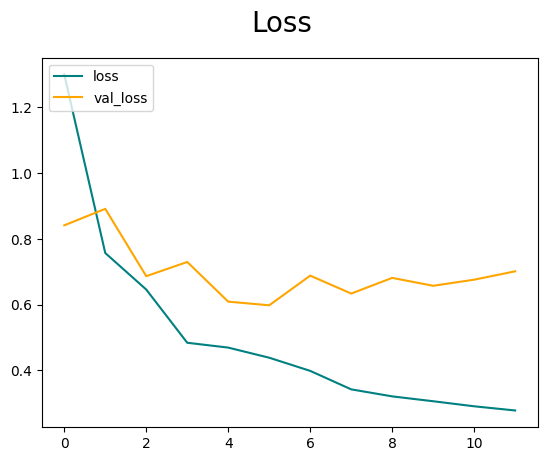

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

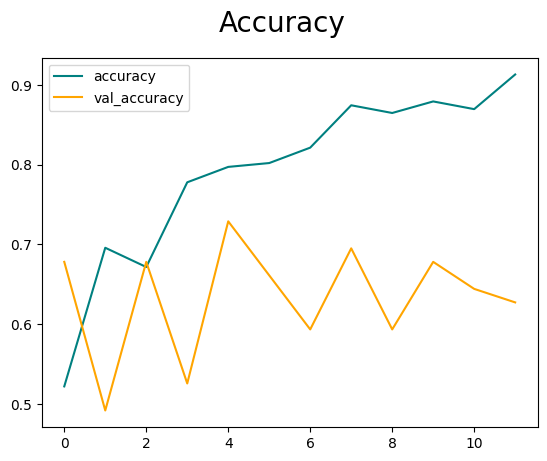

In [40]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [41]:
print(f"Training Accuracy: {hist.history['accuracy'][-1]}")
print(f"Validation Accuracy: {hist.history['val_accuracy'][-1]}")

Training Accuracy: 0.9130434989929199
Validation Accuracy: 0.6271186470985413
